In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import Benchmark_MatMul, Benchmark_Conv

In [4]:
kernelsize = 15
iterations = 3
dev = "/cpu:0"

In [7]:
numsteps = 25

timeUsedMult = np.zeros(numsteps)
opsMult = np.zeros(numsteps)
matsizeMult = np.zeros(numsteps)
for step in range(0,numsteps):
    matsizeMult[step] = (step+1)*50
    opsMult[step] = matsizeMult[step]**3 + (matsizeMult[step]-1)*matsizeMult[step]**2       # matsize**3 multiplications, (matsize-1)*matsize**2 additions
    timeUsedMult[step] = Benchmark_MatMul(matsizeMult[step],iterations,dev)

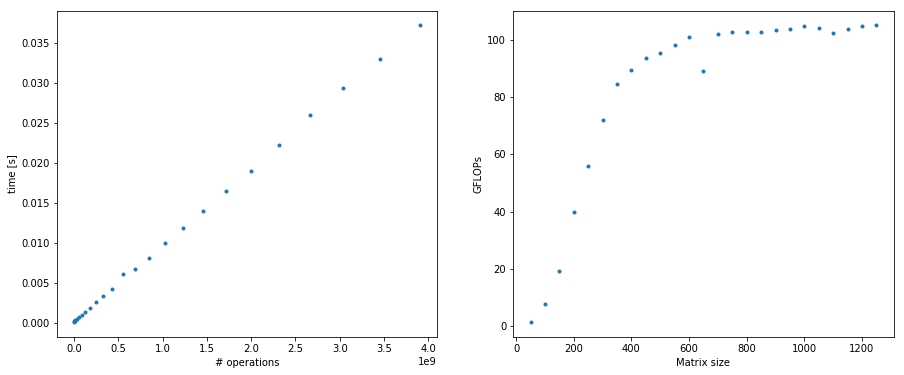

In [8]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsMult,timeUsedMult,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeMult,opsMult*1e-9/timeUsedMult,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

In [9]:
numsteps = 25

timeUsedConv = np.zeros(numsteps)
opsConv = np.zeros(numsteps)
matsizeConv = np.zeros(numsteps)

for step in range(0,numsteps):
    matsizeConv[step] = (step+1)*50
    opsConv[step] = (matsizeConv[step]-kernelsize+1)**2 * (kernelsize**3 + (kernelsize-1)*kernelsize**2)     # (matsize.kernelsize+1)**2 GEMMs
    timeUsedConv[step] = Benchmark_Conv(matsizeConv[step],kernelsize,iterations,dev)

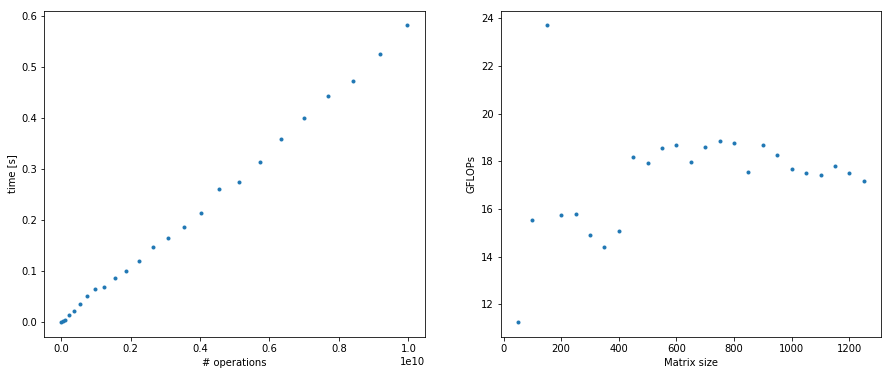

In [10]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsConv,timeUsedConv,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeConv,opsConv*1e-9/timeUsedConv,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

In [1]:
import os

In [2]:
import sys

In [4]:
os.getcwd()

'/Users/djustus'